# PACKAGES

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
image_size = 256
batch_size = 64

dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/tomato-disease/tomatoes",
                                                              image_size = (image_size, image_size),
                                                              batch_size = batch_size)

class_names = dataset.class_names
print(class_names)

Found 3453 files belonging to 3 classes.
['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus']


In [3]:
def split_dataset(dataset, train_ds = 0.8, val_ds = 0.1, test_ds = 0.1, shuffle_size=5000):

  dataset = dataset.shuffle(shuffle_size, seed=12)

  train_minibatches = int(train_ds * len(dataset))
  val_minibatches = int(val_ds * len(dataset))

  train_ds = dataset.take(train_minibatches)
  val_ds = dataset.skip(train_minibatches).take(val_minibatches)
  test_ds = dataset.skip(train_minibatches).skip(val_minibatches)

  return train_ds, val_ds, test_ds

In [4]:
train_ds, val_ds, test_ds = split_dataset(dataset)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [86]:
model = models.Sequential([layers.Resizing(image_size, image_size),
                           layers.Rescaling(1.0/255),
                           layers.RandomFlip("horizontal_and_vertical"),
                           layers.RandomRotation(0.2),
                           layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (64, 256, 256, 3)),
                           layers.MaxPooling2D(pool_size = (2, 2)),
                           layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
                           layers.MaxPooling2D(pool_size = (2, 2)),
                           layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
                           layers.MaxPooling2D(pool_size = (2, 2)),
                           layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
                           layers.MaxPooling2D(pool_size = (2, 2)),
                           layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"),
                           layers.MaxPooling2D(pool_size = (2, 2)),
                           layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding="same"),
                           layers.MaxPooling2D(pool_size = (2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(3, activation="softmax")])

model.build(input_shape=(64, 256, 256, 3))

In [87]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_35 (Resizing)      (64, 256, 256, 3)         0         
                                                                 
 rescaling_35 (Rescaling)    (64, 256, 256, 3)         0         
                                                                 
 random_flip_35 (RandomFlip  (64, 256, 256, 3)         0         
 )                                                               
                                                                 
 random_rotation_35 (Random  (64, 256, 256, 3)         0         
 Rotation)                                                       
                                                                 
 conv2d_231 (Conv2D)         (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d_46 (MaxPooli  (64, 127, 127, 32)      

In [88]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(train_ds, epochs=20, batch_size=batch_size, validation_data=val_ds)

Epoch 1/20
43/43 [==============================] - 11s 151ms/step - loss: 1.1243 - accuracy: 0.4547 - val_loss: 0.9912 - val_accuracy: 0.5063
Epoch 2/20
43/43 [==============================] - 5s 118ms/step - loss: 0.9667 - accuracy: 0.4707 - val_loss: 0.9839 - val_accuracy: 0.5063
Epoch 3/20
43/43 [==============================] - 5s 121ms/step - loss: 0.9712 - accuracy: 0.4780 - val_loss: 0.9906 - val_accuracy: 0.5063
Epoch 4/20
43/43 [==============================] - 5s 122ms/step - loss: 0.9662 - accuracy: 0.4780 - val_loss: 0.9854 - val_accuracy: 0.5063
Epoch 5/20
43/43 [==============================] - 5s 120ms/step - loss: 0.9669 - accuracy: 0.4623 - val_loss: 0.9836 - val_accuracy: 0.5063
Epoch 6/20
43/43 [==============================] - 5s 122ms/step - loss: 0.9650 - accuracy: 0.4674 - val_loss: 0.9880 - val_accuracy: 0.5063
Epoch 7/20
43/43 [==============================] - 5s 119ms/step - loss: 0.9646 - accuracy: 0.4645 - val_loss: 0.9919 - val_accuracy: 0.5063
Epoch

KeyboardInterrupt: 

In [90]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 0s 53ms/step - loss: 0.9513 - accuracy: 0.5052


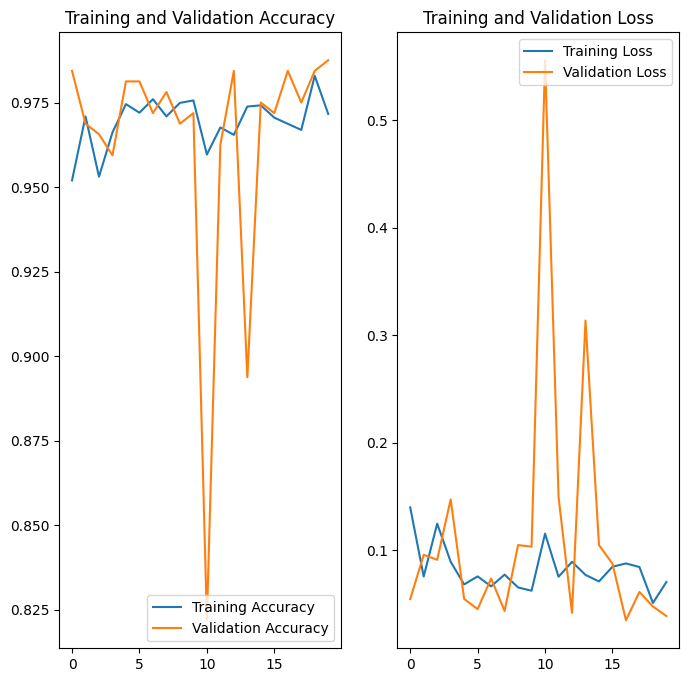

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()